In [40]:
import numpy as np


In [41]:

# Assume your model depends on both the squared terms and the interaction terms
# Features: 6 samples, 2 variables
x = np.array([
    [1, 2],
    [2, 1],
    [3, 0],
    [1, 3],
    [2, 4],
    [0, 5]
])

# Targets (quadratic relationship: See image)
y = np.array([
    [9],
    [12],
    [19],
    [12],
    [21],
    [16]
])


In [42]:
# The first thing is to define the phi matrix and the initial weights
phi = np.array([[1,4,2,1,2,1],
              [4,1,2,2,1,1],
              [9,0,0,3,0,1],
              [1,9,3,1,3,1],
              [4,16,8,2,4,1],
              [0,25,0,0,5,1]])

y = np.array([
    [9],
    [12],
    [19],
    [12],
    [21],
    [16]
])

w = np.array([[1], [1], [1], [1], [1], [1]])

In [43]:
# Let's give the user the chance to enter the learning rate and the
# number of iterations
lr = float(input('Enter the learning rate\n'))
niter = int(input('Enter the number of iterations\n'))

Enter the learning rate
0.01
Enter the number of iterations
50


In [44]:
loss_hist = [] # Recording the loss over iterations

In [45]:
weight_hist = [] # Recording the weights over iterations

In [46]:
# Determine the number of samples we have by extracting the number of rows
# of the phi matrix
ns = phi.shape[0]
print(f'Number of samples {ns}\n')

Number of samples 6



Below is the formula for the loss

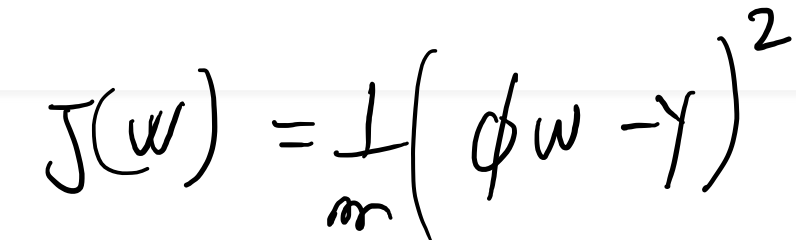

Below is the formula for the gradient
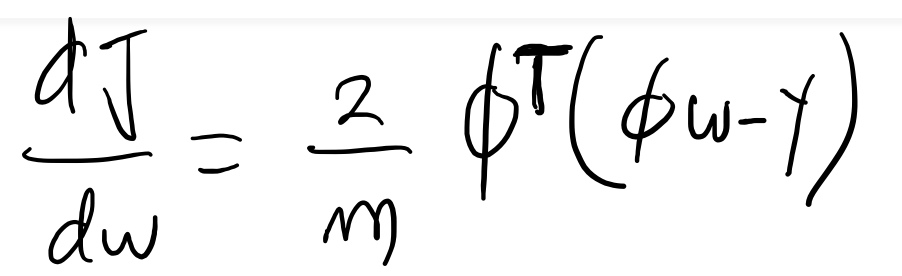

In [47]:
# Make the training loop. This is where we train the regression algorithm
for i in range(niter):
  loss = np.mean((phi @ w - y)**2)
  loss_hist.append(loss)

  # Let's calculate the gradient and update the weights
  gradient = (2/ns) * phi.T @ ((phi @ w - y))

  # Update weights
  w = w - lr * gradient

  # Store current weights
  weight_hist.append(w.flatten())

  # Print the loss every 10 iterations
  if i % 10 == 0:
    print(f"Iteration {i}, Loss: {loss}")



Iteration 0, Loss: 83.0
Iteration 10, Loss: 13184921363.375834
Iteration 20, Loss: 2.373569411858227e+18
Iteration 30, Loss: 4.272935422244909e+26
Iteration 40, Loss: 7.692202735449562e+34


Remember that the predictions look like this
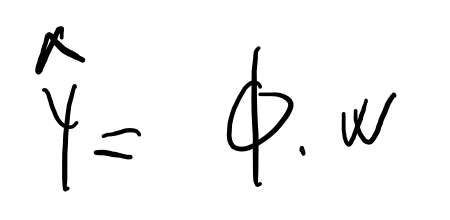

In [48]:
# Final weights and predictions
print("Final weights:")
print(w)
final_predictions = phi @ w # Remember that y = phi w
print("Final predictions:")
print(final_predictions)

Final weights:
[[2.71683314e+19]
 [2.64287089e+20]
 [4.85781416e+19]
 [1.50646729e+19]
 [6.15927309e+19]
 [1.57377655e+19]]
Final predictions:
[[1.33546087e+21]
 [5.77576540e+20]
 [3.05446767e+20]
 [2.76706719e+21]
 [5.01812992e+21]
 [6.93087865e+21]]


In [49]:
# Convert weight history to a numpy array for plotting
weight_history = np.array(weight_hist) # It was a list now it's an array, so I can plot it
weight_history.shape
# print(weight_history)

(50, 6)

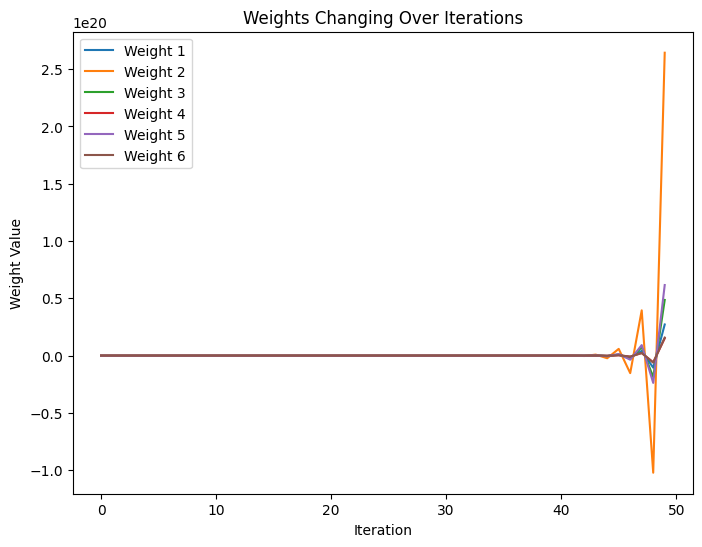

In [50]:
# Plot the weights changing with iterations
plt.figure(figsize=(8, 6))
# Here we're plotting both w1, w2 and w3, and seeing how they change with the number of
# iterations
for i in range(weight_history.shape[1]):
    plt.plot(range(niter), weight_history[:, i], label=f'Weight {i + 1}')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weights Changing Over Iterations')
plt.legend()
# plt.grid(True)
plt.show()

In [51]:
# # -------- Plot features vs targets --------
# # Feature is phi[:,0] (the first column, not the bias)
# x = phi[:, 0]
# y_true = y.flatten()
# y_pred = final_predictions.flatten()

# plt.figure(figsize=(6, 5))
# plt.scatter(x, y_true, color='blue', label='Targets (y)')
# plt.plot(x, y_pred, color='red', label='Model prediction')
# plt.xlabel('Feature')
# plt.ylabel('Target')
# plt.title('Feature vs Target with Fitted Line')
# plt.legend()
# plt.show()

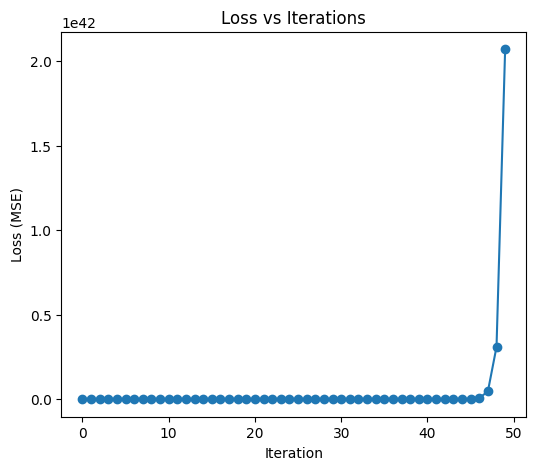

In [52]:
# ---- Plot loss over iterations ----
plt.figure(figsize=(6, 5))
plt.plot(range(niter), loss_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations')
plt.show()

Remember that the closed-form solution looks like this

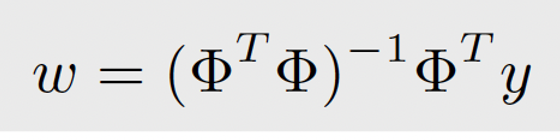

In [53]:
# Now using the closed-form solution

first = phi.T @ phi
second = np.linalg.inv(first)
third = phi.T @ y
w_cl = second @ third

In [54]:
# Final weights and predictions
print("Exact weights:")
print(w_cl)
y_closed = phi @ w_cl
print("Closed_form results:")
print(y_closed)
print(y_true)
print(y_pred)

Exact weights:
[[ 2.00000000e+00]
 [-3.97903932e-13]
 [ 2.91322522e-13]
 [-5.45696821e-12]
 [ 3.00000000e+00]
 [ 1.00000000e+00]]
Closed_form results:
[[ 9.]
 [12.]
 [19.]
 [12.]
 [21.]
 [16.]]
[ 3  5  7  9 11]
[ 3.16845658  5.09767457  7.02689257  8.95611056 10.88532855]


In [55]:
print(phi[:,0].shape, y.shape, y_closed.shape)
print(phi[:,0].shape, y.flatten().shape, y_closed.flatten().shape)

(6,) (6, 1) (6, 1)
(6,) (6,) (6,)


In [56]:
# # -------- Plot features vs targets vs closed-form--------
# # Feature is phi[:,0] (the first column, not the bias)
# x = phi[:, 0]
# y_true = y.flatten()
# y_pred = final_predictions.flatten()
# y_closed = y_closed.flatten()

# plt.figure(figsize=(6, 5))
# plt.scatter(x, y_true, color='blue', label='Targets (y)')
# plt.plot(x, y_pred, color='red', label='Model prediction')
# plt.plot(x, y_closed, color='green', label='Closed-form prediction')
# plt.xlabel('Feature')
# plt.ylabel('Target')
# plt.title('Feature vs Target with Fitted Line')
# plt.legend()
# plt.show()